# Making map plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from matplotlib.patches import Patch
import matplotlib as mpl

### Import the data

In [2]:
london = pd.read_csv('../data/london2022.csv')
merseyside = pd.read_csv('../data/merseyside2022.csv')

# https://geoportal.statistics.gov.uk/datasets/02e8d336d6804fbeabe6c972e5a27b16_0/explore?location=53.390230%2C-2.976211%2C12.31&showTable=true
lsoa_shapes = gpd.read_file('../data/mapping_csvs/LSOA_boundaries/LSOA_2021_EW_BSC_V4.shp')


## Plot the MERSEYSIDE LSOA Stop count

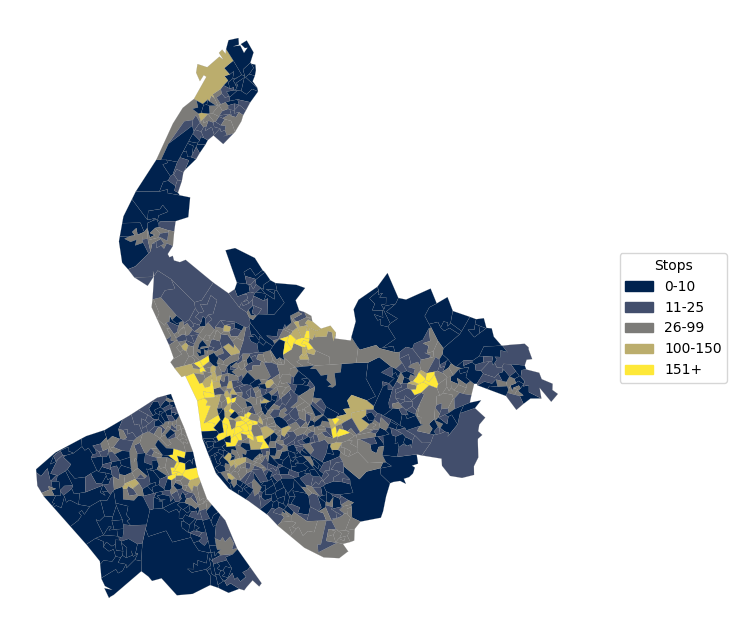

In [60]:
df_stops = merseyside[['LSOA21CD', 'StopCount']]

# Merge LSOA shapes with your stop and search data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_stops['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_stops, on='LSOA21CD', how='left')


bins = [0, 10, 25, 99, 150, float('inf')]
bin_labels = ['0-10', '11-25', '26-99', '100-150', '151+']


# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='StopCount', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap, 
                  norm=norm,
                  vmin=bins[0], vmax=bins[len(bin_labels)-1])


# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]



# Add legend to the plot
ax.legend(handles=legend_handles, title="Stops", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')



ax.set_axis_off()
# plt.savefig('../figures_and_plots/merseyside_stops_map.svg', bbox_inches='tight')

plt.show()


## Plot the LONDON LSOA Stop count

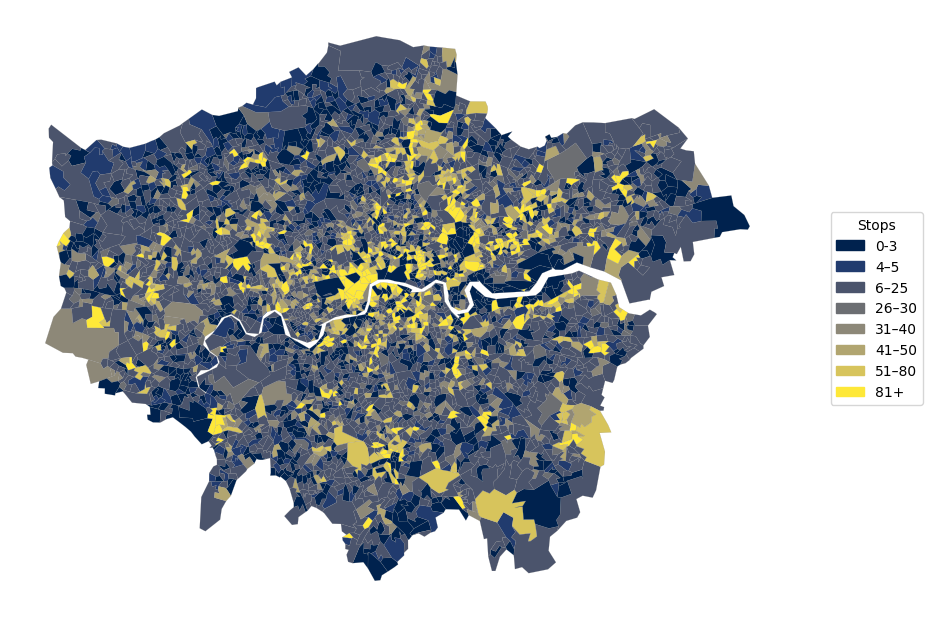

In [81]:
df_stops = london[['LSOA21CD', 'StopCount']]

# Merge LSOA shapes with your stop and search data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_stops['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_stops, on='LSOA21CD', how='left')

# Define the bins and their labels
bins = [0, 3, 5, 25, 30, 40, 50, 80, float('inf')]
bin_labels = ['0-3', '4–5', '6–25', '26–30', '31–40', '41–50', '51–80', '81+']



# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='StopCount', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap, 
                  norm=norm,
                  vmin=bins[0], vmax=bins[len(bin_labels)-1])


# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]



# Add legend to the plot
ax.legend(handles=legend_handles, title="Stops", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')



ax.set_axis_off()
# plt.savefig('../figures_and_plots/london_stops_map.svg', bbox_inches='tight')

plt.show()


# Plotting the HOUSE PRICES

## Merseyside

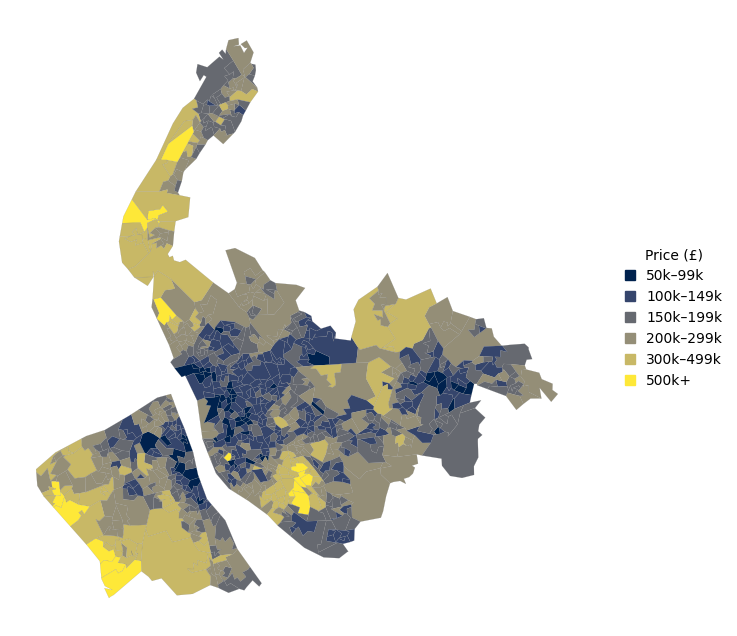

In [19]:


df_price = merseyside[['LSOA21CD','MeanHousePrice']]
# df_price.columns = ['LSOA21CD', 'price']  # Match LSOA code column name

# Merge LSOA shapes with your price data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_price['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_price, on='LSOA21CD', how='left')

merged_lsoas['MeanHousePrice'] = merged_lsoas['MeanHousePrice'].fillna(merged_lsoas['MeanHousePrice'].mean())


# Define the bins and their labels
bins = [50000, 99999, 149999, 199999, 299999, 499999, float('inf')]
bin_labels = ['50k–99k', '100k–149k', '150k–199k', '200k–299k', '300k–499k', '500k+']



# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='MeanHousePrice', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="Price (£)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
plt.savefig('../figures_and_plots/merseyside_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


## London

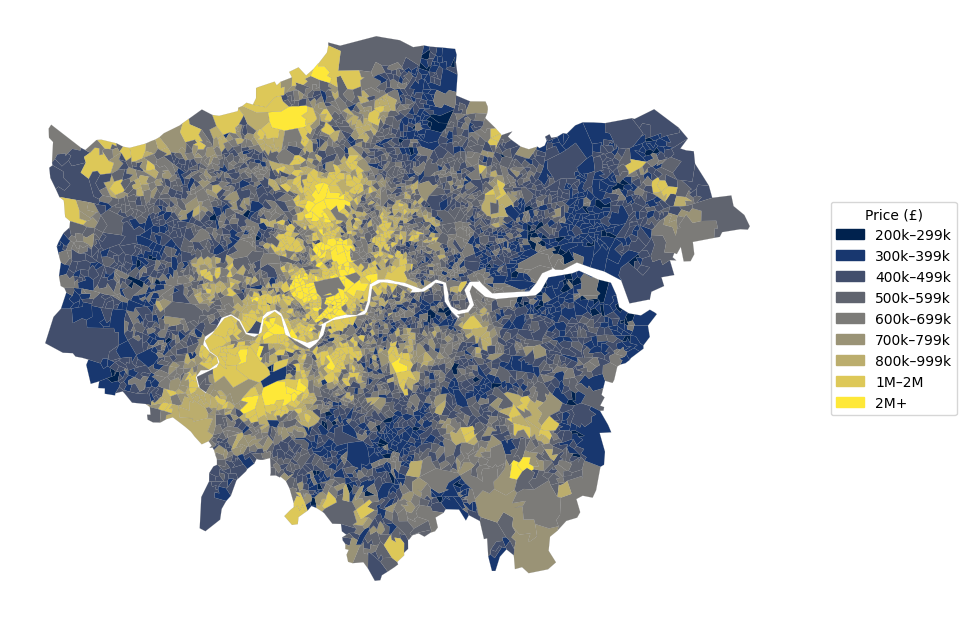

In [18]:


df_price = london[['LSOA21CD','MeanHousePrice']]
# df_price.columns = ['LSOA21CD', 'price']  # Match LSOA code column name

# Merge LSOA shapes with your price data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_price['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_price, on='LSOA21CD', how='left')

merged_lsoas['MeanHousePrice'] = merged_lsoas['MeanHousePrice'].fillna(merged_lsoas['MeanHousePrice'].mean())


# Define the bins and their labels
bins = [200000, 300000, 400000, 500000, 600000, 700000, 800000, 1000000, 2000000, float('inf')]
bin_labels = ['200k–299k', '300k–399k', '400k–499k', '500k–599k', '600k–699k', '700k–799k', '800k–999k', '1M–2M', '2M+']

# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='MeanHousePrice', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, title="Price (£)", loc='upper right')
ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
# plt.savefig('../figures_and_plots/london_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


# Plotting the Ethnic distribution

In [7]:
merseyside

,Unnamed: 0,LSOA21CD,StopCountDrugs,ArrestOutcome,DistToTrainStation,StopCount,Borough,Population,NonWhitePopulationPercentage,IncomeDomainScore,CrimeSum,DrugCrimeSum,MeanHousePrice
0,0,E01006434,99.0,7.0,2017.80,114.0,Knowsley,1518,1.91,0.361,234.0,27.0,123955.0
1,1,E01006435,91.0,6.0,1844.68,113.0,Knowsley,1524,3.35,0.370,150.0,18.0,134664.0
2,2,E01006436,200.0,8.0,1446.13,226.0,Knowsley,1457,3.29,0.384,317.0,59.0,111733.0
3,3,E01006437,560.0,35.0,1164.51,673.0,Knowsley,1387,3.03,0.326,941.0,77.0,119648.0
4,4,E01006438,43.0,3.0,4154.79,52.0,Knowsley,1153,5.29,0.099,92.0,7.0,331221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,918,E01034836,NaN,NaN,NaN,0.0,Wirral,1253,7.10,NaN,9.0,2.0,NaN
919,919,E01034837,NaN,NaN,NaN,0.0,Wirral,1638,6.59,NaN,10.0,2.0,NaN
920,920,E01034838,NaN,NaN,NaN,0.0,Wirral,1022,8.41,NaN,7.0,2.0,NaN
921,921,E01034839,NaN,NaN,NaN,0.0,Wirral,1043,7.86,NaN,11.0,2.0,NaN


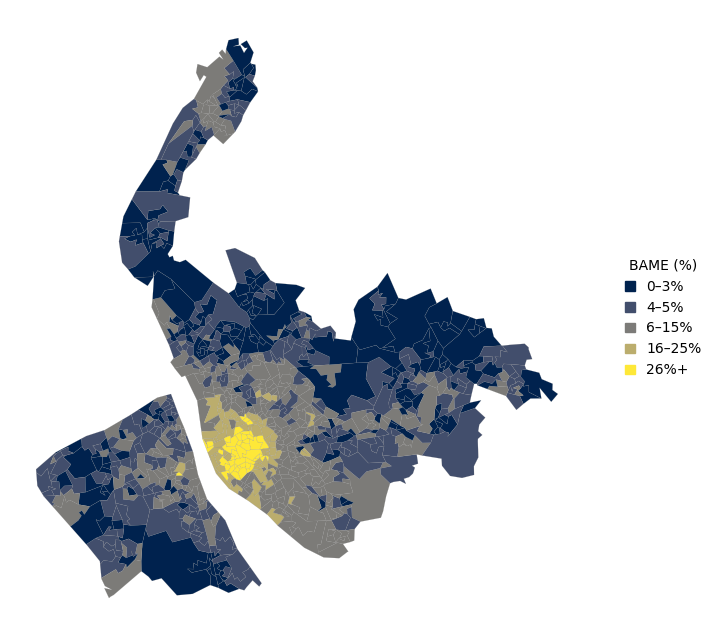

In [33]:


df_ethnic = merseyside[['LSOA21CD','NonWhitePopulationPercentage']]

# Merge LSOA shapes with your price data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_ethnic['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_ethnic, on='LSOA21CD', how='left')



# Define the bins and their labels
bins = [0, 3, 5, 15, 25, float('inf')]
bin_labels = ['0–3%', '4–5%', '6–15%', '16–25%', '26%+']



# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='NonWhitePopulationPercentage', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="BAME (%)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
# plt.savefig('../figures_and_plots/merseyside_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()


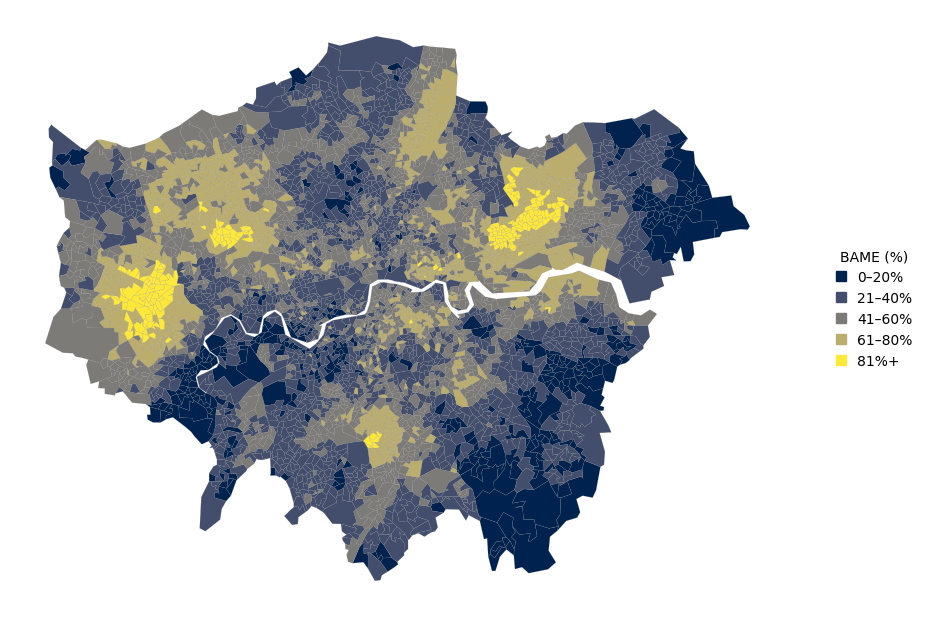

In [36]:


df_ethnic = london[['LSOA21CD','NonWhitePopulationPercentage']]

# Merge LSOA shapes with your price data
merged_lsoas = lsoa_shapes[lsoa_shapes['LSOA21CD'].isin(df_ethnic['LSOA21CD'])]
merged_lsoas = merged_lsoas.merge(df_ethnic, on='LSOA21CD', how='left')



# Define the bins and their labels
bins = [0, 20, 40, 60, 80, float('inf')]
bin_labels = ['0–20%', '21–40%', '41–60%', '61–80%', '81%+']


# Define colour mapping based on the bins
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=256)

# Plot the map with the stop counts and colour coding
fig, ax = plt.subplots(figsize=(10, 8))

merged_lsoas.plot(column='NonWhitePopulationPercentage', 
                  linewidth=0.1, 
                  edgecolor='grey', 
                  legend=False, 
                  ax=ax, 
                  cmap=cmap,
                  norm=norm,  # Apply the normalisation
                  vmin=bins[0], vmax=bins[-2])  # Correct the vmax for the maximum value in bins

# Create legend with boxes for each bin
legend_handles = [Patch(color=cmap(norm(bins[i])), label=bin_labels[i]) for i in range(len(bin_labels))]

# Add legend to the plot
ax.legend(handles=legend_handles, 
          title="BAME (%)", 
          loc='upper right',
          frameon=False,
          handlelength=0.7)

ax.get_legend().set_bbox_to_anchor((1.05, 0.5)) 
ax.get_legend().set_loc('center left')

# Hide axes
ax.set_axis_off()
# plt.savefig('../figures_and_plots/merseyside_houseprice_map.svg', bbox_inches='tight')

# Show the plot
plt.show()
